<a href="https://colab.research.google.com/github/suuzzyy/Raster_Manipulation/blob/main/Taufik_Hidayat06_ManipulasiDataRaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoSeries, GeoDataFrame

In [ ]:
import rasterio as rio
import rasterio.plot as rioplot
import rioxarray as rxr
import pyproj
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
from rasterio.plot import show

In [ ]:
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et

In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Directory setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("drive/MyDrive/KOKUSCLASS/DataRaster/Data")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/KOKUSCLASS/DataRaster/Data'

# Akses data landsat google cloud

In [ ]:
fileB1 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/116/060/LC08_L1GT_116060_20200615_20200615_01_RT/LC08_L1GT_116060_20200615_20200615_01_RT_B1.TIF'
fileB2 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/116/060/LC08_L1GT_116060_20200615_20200615_01_RT/LC08_L1GT_116060_20200615_20200615_01_RT_B2.TIF'
fileB3 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/116/060/LC08_L1GT_116060_20200615_20200615_01_RT/LC08_L1GT_116060_20200615_20200615_01_RT_B3.TIF'
fileB4 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/116/060/LC08_L1GT_116060_20200615_20200615_01_RT/LC08_L1GT_116060_20200615_20200615_01_RT_B4.TIF'
fileB5 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/116/060/LC08_L1GT_116060_20200615_20200615_01_RT/LC08_L1GT_116060_20200615_20200615_01_RT_B5.TIF'
fileB6 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/116/060/LC08_L1GT_116060_20200615_20200615_01_RT/LC08_L1GT_116060_20200615_20200615_01_RT_B6.TIF'
fileB7 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/116/060/LC08_L1GT_116060_20200615_20200615_01_RT/LC08_L1GT_116060_20200615_20200615_01_RT_B7.TIF'
fileB8 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/116/060/LC08_L1GT_116060_20200615_20200615_01_RT/LC08_L1GT_116060_20200615_20200615_01_RT_B8.TIF'
fileB9 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/116/060/LC08_L1GT_116060_20200615_20200615_01_RT/LC08_L1GT_116060_20200615_20200615_01_RT_B9.TIF'



In [ ]:
with rio.open(fileB1) as imgB1:
  rsL8b1 = imgB1.read()
  print('imgB1.profile: ', imgB1.profile)

with rio.open(fileB2) as imgB2:
  rsL8b2 = imgB2.read()
  print('imgB2.profile: ', imgB2.profile)

with rio.open(fileB3) as imgB3:
  rsL8b3 = imgB3.read()
  print('imgB2.profile: ', imgB3.profile)

with rio.open(fileB4) as imgB4:
  rsL8b4 = imgB4.read()
  print('imgB2.profile: ', imgB4.profile)

with rio.open(fileB5) as imgB5:
  rsL8b5 = imgB5.read()
  print('imgB2.profile: ', imgB5.profile)

imgB1.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7581, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32650), 'transform': Affine(30.0, 0.0, 468585.0,
       0.0, -30.0, 115815.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
imgB2.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7581, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32650), 'transform': Affine(30.0, 0.0, 468585.0,
       0.0, -30.0, 115815.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
imgB2.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7581, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32650), 'transform': Affine(30.0, 0.0, 468585.0,
       0.0, -30.0, 115815.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
imgB2.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'widt

Alternatif code untuk simplifikasi:


1.   membuat list file landsat
2.   membuat metadata dari 1 file yang akan digunakan untuk file stacking
3.   membuka dan melakukan layer stacking kemudian menyimpan file dengan nama Landsat8.tif pada directory utama
4.   memanggil ulang data tif



In [ ]:
# 1. List data landsat
fileL8 = [fileB1, fileB2, fileB3, fileB4, fileB5, fileB6, fileB7, fileB8, fileB9]

In [ ]:
# 2. Create Metadata
r = rio.open(fileL8[0])
meta = r.meta
meta.update(count = len(fileL8))
meta.update(driver = "GTiff")
print(meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7581, 'height': 7741, 'count': 9, 'crs': CRS.from_epsg(32650), 'transform': Affine(30.0, 0.0, 468585.0,
       0.0, -30.0, 115815.0)}


In [ ]:
# 3. Membuka semua file kemudian menyimpannya sebagai file baru
with rio.open("Bontang_Landsat8.tif", "w", **meta) as dst:
    for id, layer in enumerate(fileL8, start = 1):
        with rio.open(layer) as src:
            dst.write(src.read(1), id)

In [ ]:
with rio.open("Bontang_Landsat8.tif") as imgL8:
  rsL8 = imgL8.read()
  print('imgL8.profile: ', imgL8.profile)

imgL8.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7581, 'height': 7741, 'count': 9, 'crs': CRS.from_epsg(32650), 'transform': Affine(30.0, 0.0, 468585.0,
       0.0, -30.0, 115815.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


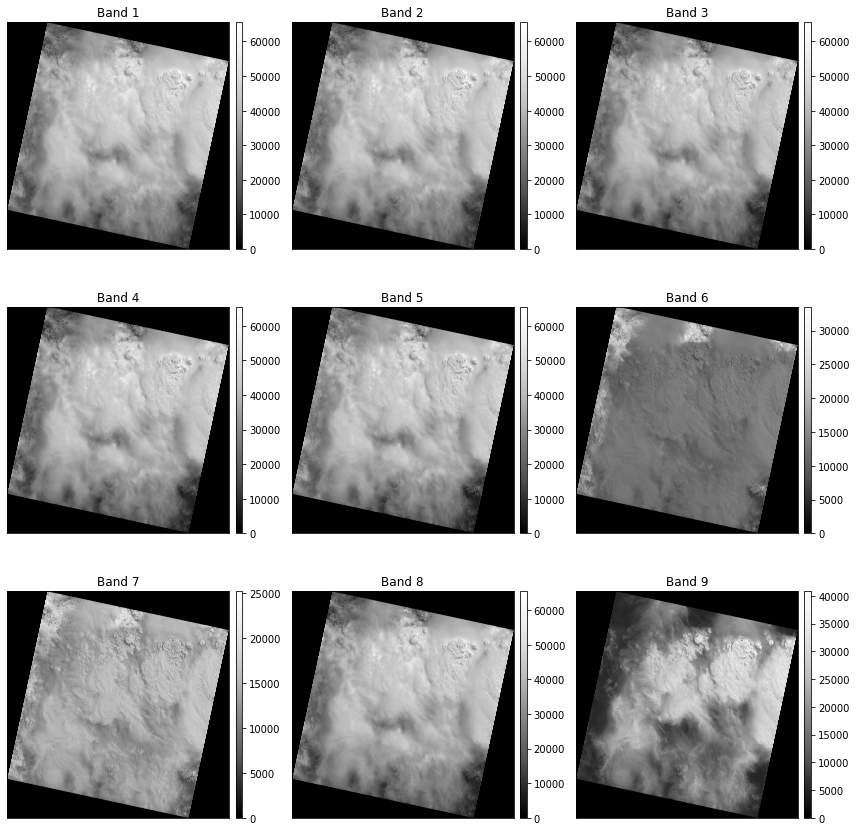

array([[<Axes: title={'center': 'Band 1'}>,
        <Axes: title={'center': 'Band 2'}>,
        <Axes: title={'center': 'Band 3'}>],
       [<Axes: title={'center': 'Band 4'}>,
        <Axes: title={'center': 'Band 5'}>,
        <Axes: title={'center': 'Band 6'}>],
       [<Axes: title={'center': 'Band 7'}>,
        <Axes: title={'center': 'Band 8'}>,
        <Axes: title={'center': 'Band 9'}>]], dtype=object)

In [ ]:
ep.plot_bands(rsL8)

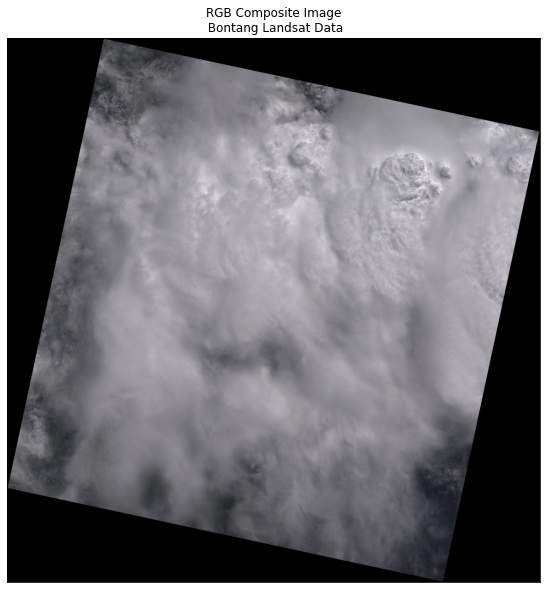

<Axes: title={'center': 'RGB Composite Image\n Bontang Landsat Data'}>

In [ ]:
ep.plot_rgb(rsL8,
            rgb=[3, 2, 1],
            title="RGB Composite Image\n Bontang Landsat Data")

In [ ]:
with rio.open(WV2) as imgWv2:
  rsWv2 = imgWv2.read()
  print(imgWv2.profile)

NameError: ignored

saat melakukan printah `print(image.profile)` maka informasi meta data dapat diketahui terutama sistem proyeksinya. Selalu pahami sistem proyeksi dari data raster yang digunakan. Kesalahan paling umum dari pengolahan data raster berbasis code adalah menggunakan data raster dengan sistem koordinat yang berbeda.

# Raster Data Manipulation

Terkait pengolahan data raster, penggunaan  library `rioarray` menurut saya lebih mempermudah karena file raster yang dibaca dengan library `rioarray` dapat memuat kedua informasi pixel dan metadatanya.

## Projection

In [ ]:
dst_crs = 'EPSG:32750'

In [ ]:
rsL8  = rxr.open_rasterio("Bontang_Landsat8.tif", masked=True).squeeze()

In [ ]:
rsL8 = rsL8.rio.reproject(dst_crs)
rsL8.rio.crs

CRS.from_epsg(32750)

## Croping or Cliping
Proses croping dilakukan menggunakan informasi extend dari data citra worldview-2

In [ ]:
boxs = rsL8.rio.bounds()
print(boxs)

(468584.9999999986, 9883585.0, 696014.9999999978, 10115815.0)


In [ ]:
rsL8c = rsL8.rio.clip_box(
    minx=468584.9999999986,
    miny=9883585.0,
    maxx=696014.99999999780,
    maxy=10115815.0,
)

/usr/local/lib/python3.9/dist-packages/rioxarray/raster_writer.py:132: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


In [ ]:
rsL8c = rsL8.rio.clip_box(minx=boxs[0], miny=boxs[1], maxx=boxs[2], maxy=boxs[3],)

In [ ]:
print(rsL8c)

<xarray.DataArray (band: 9, y: 7741, x: 7581)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0.,

## Masking

In [ ]:
# Buka file raster pulau gili
vctpulau = gpd.read_file("KOTABONTANG/ADMINISTRASIKECAMATAN_AR_50K.shp")
print("CRS: ", vctpulau.crs)

CRS:  EPSG:9518


Sistem proyeksi data vektor berbeda dengan data raster. Sehinga reprojection perlu dilakukan.

CRS:  EPSG:32750


<Axes: >

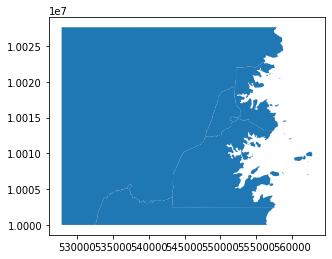

In [ ]:
vctpulau = vctpulau.to_crs(dst_crs)
print("CRS: ", vctpulau.crs)
vctpulau.plot()

In [ ]:
inRas1='Bontang_Landsat8.tif'

In [ ]:
#mendefinisikan path dari file yang nantinya akan disimpan setelah proses clipping
outRas1 = '/Clipped1.tif'



with rio.open(inRas1) as src: #membuka data raster pada file yang ditentukan
    Vector=vctpulau.to_crs(src.crs) #mereprojeksikan shapefile ke CRS yang sama dengan data raster yang dibuka
    print(Vector.crs) #mencetak hasil proyeksi dari data vektor
    out_image, out_transform=mask(src,Vector.geometry,crop=True) #melakukan masking pada data raster dengan memanfaatkan geometri dari shapefile
    out_meta=src.meta.copy() # menduplikat metadata dari data raster yang dibuka

out_meta.update({ #memperbarui metadata hasil duplikasi dengan beberapa informasi tambahan
    "driver":"Gtiff",
    "height":out_image.shape[1], # height starts with shape[1]
    "width":out_image.shape[2], # width starts with shape[2]
    "transform":out_transform
})

with rio.open(outRas1,'w',**out_meta) as dst: #membuka file baru pada outRas1 yang akan digunakan untuk menyimpan hasil masking data raster.
    dst.write(out_image) #menulis data raster hasil masking ke dalam file baru yang telah dibuka

PROJCS["WGS 84 / UTM zone 50N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32650"]]


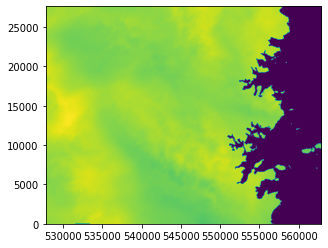

In [ ]:
#menampilkan data raster dalam bentuk plot.
with rio.open(outRas1) as src:
  show(src)

In [ ]:
with rio.open(inRas1) as src:
    Vector=vctpulau.to_crs(src.crs)
    print(Vector.crs)
    out_image, out_transform=mask(src,Vector.geometry,crop=True)
    out_meta=src.meta.copy() # copy the metadata of the source DEM

out_meta.update({
    "driver":"Gtiff",
    "height":out_image.shape[1], # height starts with shape[1]
    "width":out_image.shape[2], # width starts with shape[2]
    "transform":out_transform
})

with rio.open(outRas1,'w',**out_meta) as dst:
    dst.write(out_image)

PROJCS["WGS 84 / UTM zone 50N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32650"]]


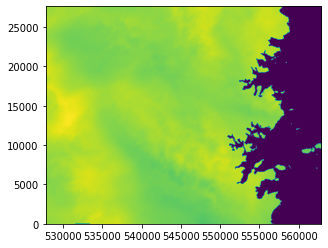

In [ ]:
with rio.open(outRas1) as src:
  show(src)

## Visualisasi

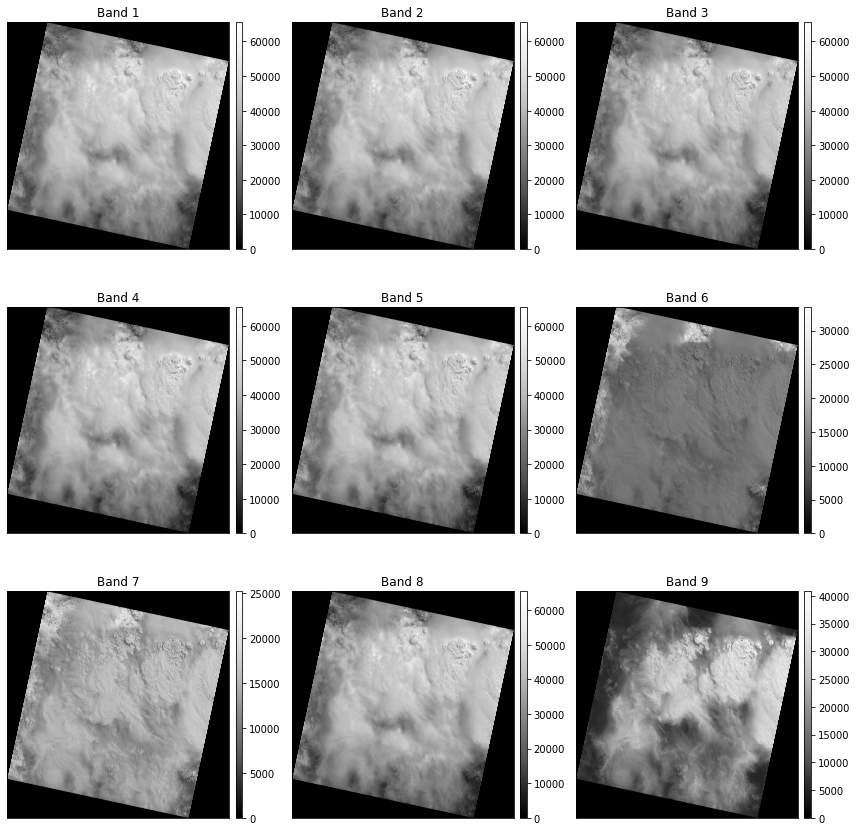

array([[<Axes: title={'center': 'Band 1'}>,
        <Axes: title={'center': 'Band 2'}>,
        <Axes: title={'center': 'Band 3'}>],
       [<Axes: title={'center': 'Band 4'}>,
        <Axes: title={'center': 'Band 5'}>,
        <Axes: title={'center': 'Band 6'}>],
       [<Axes: title={'center': 'Band 7'}>,
        <Axes: title={'center': 'Band 8'}>,
        <Axes: title={'center': 'Band 9'}>]], dtype=object)

In [ ]:
ep.plot_bands(rsL8c)

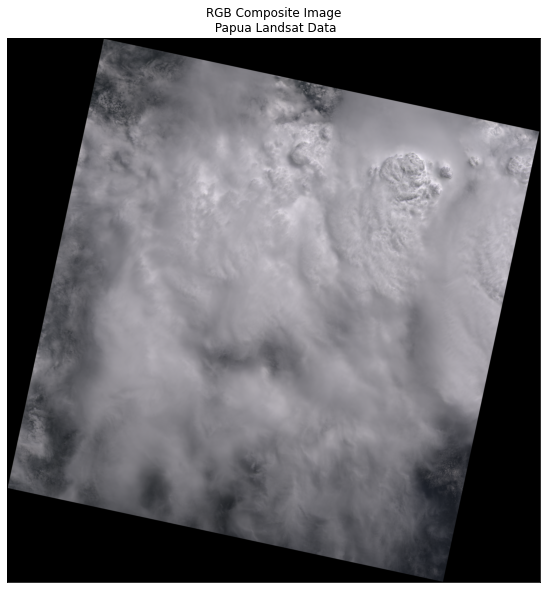

<Axes: title={'center': 'RGB Composite Image\n Papua Landsat Data'}>

In [ ]:
ep.plot_rgb(rsL8.values,
            rgb=[3, 2, 1],
            title="RGB Composite Image\n Bontang Landsat Data")